# Лабораторная работа №1.

## Условие

Вариант №2.

Распределения: 

$$\mathbf{X_1} \sim R(2, 6)$$

$$\mathbf{X_2} \sim R(2, 6)$$

Объёмы выборок:

$$ n_1 = 50$$

$$ n_2 = 50 $$


Статистическая гипотеза $H_0$:

$$m_1 = 4 \ (\sigma_1\text{ - известна})$$

## Импорты

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from time import time
from IPython.display import display, Math, Markdown  # для вывода формул в консоль

## Определения

In [52]:
a1, b1, n1 = 2, 6, 50
a2, b2, n2 = 2, 6, 50

In [ ]:
def mprint(*strings):
    for s in strings:
        display(Markdown(s))


np.random.seed(int(time()))
plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

## 1. Исходные данные

| СВ             | Распределение | Параметры          | Математическое ожидание, $m_i$   | Дисперсия, $\sigma_i^2$                                 |
| -------------- | ------------- | ------------------ | -------------------------------- | ------------------------------------------------------- |
| $\mathbf{X_1}$ | $R(2, 6)$     | $a_1 = 2, b_1 = 6$ | $m_1 = \dfrac{a_1 + b_1}{2} = 4$ | $\sigma_1^2 = \dfrac{(b_1 - a_1)^2}{12} = \dfrac{4}{3}$ |
| $\mathbf{X_2}$ | $R(2, 6)$     | $a_2 = 2, b_2 = 6$ | $m_2 = \dfrac{a_2 + b_2}{2} = 4$ | $\sigma_2^2 = \dfrac{(b_2 - a_2)^2}{12} = \dfrac{4}{3}$ |


In [ ]:
X1 = np.random.uniform(a1, b1, n1)
X2 = np.random.uniform(a2, b2, n2)

mprint(f"$\\mathbf{{X1}}$: {X1[:10].round(2)}")
mprint(f"$\\mathbf{{X2}}$: {X2[:10].round(2)}")

$\mathbf{X1}$: [3.55 2.3  5.3  3.07 4.7  3.99 3.84 5.01 5.59 4.14]

$\mathbf{X2}$: [3.85 3.08 2.63 2.38 5.61 4.7  2.76 2.72 3.42 5.76]

### Выборочные характеристики

Мы имеем выборку, нам нужно рассчитать **несмещенную** оценку с.к.о. и дисперсии, поэтому применяем формулы:

$$ s = \sqrt{\dfrac{1}{n - 1} \sum\limits_{i = 1}^{n} (x_i - \overline{x})^2} $$
$$ s^2 = \dfrac{1}{n - 1} \sum\limits_{i = 1}^{n} (x_i - \overline{x})^2 $$

Множитель $\dfrac{1}{n - a}$  в `numpy` достигается передачей параметра `ddof=a`, в данном случае `ddof=1`. 

In [ ]:
mean1 = X1.mean()
s1 = X1.std(ddof=1)
S1 = X1.var(ddof=1)

mean2 = X2.mean()
s2 = X2.std(ddof=1)
S2 = X2.var(ddof=1)

X_pooled = np.concat((X1, X2))
mean_pooled = X_pooled.mean()
s_pooled = X_pooled.std(ddof=1)
S_pooled = X_pooled.var(ddof=1)

mprint(
    f"$\\overline{{x_1}} =$ {mean1:.2f}, $s_1^2 =$ {S1:.2f}, $s_1$ = {s1:.2f}, $n_1 =$ {n1}"
)
mprint(
    f"$\\overline{{x_2}} =$ {mean2:.2f}, $s_2^2 =$ {S2:.2f}, $s_2$ = {s2:.2f}, $n_2 =$ {n2}"
)

mprint(
    f"$\\overline{{x_{{pooled}}}} =$ {mean_pooled:.2f}, $s_{{pooled}}^2 =$ {S_pooled:.2f}, $s_{{pooled}}$ = {s_pooled:.2f}, $n_{{pooled}} =$ {n1 + n2}",
)

$\overline{x_1} =$ 4.00, $s_1^2 =$ 1.34, $s_1$ = 1.16, $n_1 =$ 50

$\overline{x_2} =$ 3.85, $s_2^2 =$ 1.70, $s_2$ = 1.31, $n_2 =$ 50

$\overline{x_{pooled}} =$ 3.92, $s_{pooled}^2 =$ 1.51, $s_{pooled}$ = 1.23, $n_{pooled} =$ 100

| СВ            | Среднее, $\overline{x_i}$ | Оценка дисперсии, $s_i^2$ | Оценка с.к.о., $s_i$ | Объём выборки, $n_i$ |
| ------------- | ------------------------- | ------------------------- | -------------------- | -------------------- |
| $\mathbf{X1}$ | 4.00                      | 1.34                      | 1.16                 | 50                   |
| $\mathbf{X2}$ | 3.85                      | 1.70                      | 1.31                 | 50                   |
| Pooled        | 3.92                      | 1.51                      | 1.23                 | 100                  |


## 2. Однопараметрические критерии

В начале лабы мы генерировали выборку по какому-то распределению. Теперь мы хотим поработать с библиотечными функциями проверки гипотез. Поэтому для различных функций будем ставить заранее верную нулевую гипотезу: просто ставить параметры изначального распределения. 

В данном случае ошибка может быть только 1-го рода: мы даём верную гипотезу, заранее зная это, но статистическое решение может отвергнуть её. Поэтому мы будем вписывать в поле "ошибка статистического решения" значение "да" только тогда, когда по $p$ value мы должны отвергать гипотезу.

In [77]:
alpha = 0.05
m0 = 4
std0 = sqrt(4 / 3)


def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

### z-test

Мы используем данную статистику критерия, когда основная гипотеза $H_0$ связана со значением математического ожидания распределения, из которого мы взяли выборку. При этом $\sigma$ считается известной.


Я не нашел адекватной библиотечной функции, которая проверяет гипотезу с известным $\sigma$, поэтому напишу её сам.

$$ Z = \dfrac{\overline{X} - m_0}{\frac{\sigma}{\sqrt{n}}} $$

Так как критическая область двусторонняя, то выражение для $p$ value примет вид:
$$ p = 2\min(F_Z(z_{выб} \mid H_0), 1 - F_Z(z_{выб} \mid H_0)) $$

In [87]:
def ztest(X, value, std):
    mean = X.mean()
    n = len(X)
    z = (mean - value) / (std / sqrt(n))
    cdf = stats.norm.cdf(z)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

В данном случае $H_0 = m_0 = 4$ - я просто предположил, что математическое ожидание распределения по выборке действительно совпадает с математическим ожиданием равномерного распределения при таких параметрах (см. [табличку](#1-исходные-данные)).

In [ ]:
z, p_value = ztest(X1, m0, std0)

mprint(
    r"### Z-test",
    f"$H_0: m_1 = m_0 = {m0}$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### Z-test

$H_0: m_1 = m_0 = 4$

$z_{выб} =$ -0.01

$p =$ 0.99

$H_0$ принимается

### t-test

Отличается от [`Z-test`](#z-test) тем, что $\sigma$ неизвестна, и считается её выборочное значение под капотом. Тут уже есть библиотечные функции.

In [ ]:
z, p_value = stats.ttest_1samp(X1, m0)

mprint(
    r"### T-test",
    f"$H_0: m_1 = m_0 = {m0}$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value),
)

### T-test

$H_0: m_1 = m_0 = 4$

$z_{выб} =$ -0.01

$p =$ 0.99

$H_0$ принимается

### $\chi^2$-test ($m$ известно)

Мы используем данную статистику критерия, когда основная гипотеза $H_0$ связана со значением $\sigma$ распределения, из которого мы взяли выборку. При этом $m$ считается известной.

Опять же я не нашёл библиотечных функций конкретно для этого случая, поэтому опять написал функцию по лекции:

$$ Z = \dfrac{n \cdot S_0^2}{\sigma_0^2} $$

$$ S_0^2 = \frac{1}{n} \cdot \sum\limits_{i=1}^{n} (X_i - m)^2 $$

Так как критическая область двусторонняя($Z$ не сильно должно отличаться от $n$ при истинности $H_0$):
$$ p = 2\min(F_Z(z_{выб} \mid H_0), 1 - F_Z(z_{выб} \mid H_0)) $$

In [122]:
def S_0(X, m):
    n = len(X)
    return np.sum((X - m) ** 2) / n


def chisquare(X, value, m):
    n = len(X)
    z = n * S_0(X, m) / value**2
    cdf = stats.chi2.cdf(z, n)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [ ]:
z, p_value = chisquare(X1, std0, m0)
mprint(
    r"### $\chi^2$-test ($m$ известно)",
    f"$H_0: \\sigma_1 = \\sigma_0 = {std0:.2f}$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### $\chi^2$-test ($m$ известно)

$H_0: \sigma_1 = \sigma_0 = 1.15$

$z_{выб} =$ 49.23

$p =$ 0.50

$H_0$ принимается

### $\chi^2$-test ($m$ неизвестно)

Отличается от [$\chi^2$-test c известным $m$](#-test--известна) тем, что считается выборочное значение $m$ под капотом. Библиотечных функций опять не завезли :(

In [124]:
def chisquare(X, value):
    n = len(X)
    z = (n - 1) * X.var(ddof=1) / value**2
    cdf = stats.chi2.cdf(z, n - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [ ]:
z, p_value = chisquare(X1, std0)

mprint(
    r"### $\chi^2$-test ($m$ неизвестно)",
    f"$H_0: \\sigma_1 = \\sigma_0 = {std0:.2f}$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value),
)

### $\chi^2$-test ($m$ неизвестно)

$H_0: \sigma_1 = \sigma_0 = 1.15$

$z_{выб} =$ 49.23

$p =$ 0.46

$H_0$ принимается

### Табличка

| Тест                         | Статистическая гипотеза, $H_0$                 | Выборочное значение статистики критерия | p-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| ---------------------------- | ---------------------------------------------- | --------------------------------------- | ------- | ------------------------------------------ | ------------------------------ |
| z-test                       | $m_1 = 4$($\sigma$ известна)                   | -0.01                                   | 0.99    | $H_0$ принимается                          | Нет                            |
| t-test                       | $m_1 = 4$($\sigma$ неизвестна)                 | -0.01                                   | 0.99    | $H_0$ принимается                          | Нет                            |
| $\chi^2$-test ($m$ известно) | $\sigma_1 = \sqrt{\frac{4}{3}}$ ($m$ известно) | 49.23                                   | 0.50    | $H_0$ принимается                          | Нет                            |
| $\chi^2$-test ($m$ неизвестно) | $\sigma_1 = \sqrt{\frac{4}{3}}$ ($m$ неизвестно) | 49.23                                   | 0.46    | $H_0$ принимается                          | Нет                            |


## 3. Двухвыборочные критерии

### 2-sample t-test

In [ ]:
z, p_value = stats.ttest_ind(X1, X2)

mprint(
    r"### 2-sample t-test",
    f"$H_0: m_1 = m_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### 2-sample t-test

$H_0: m_1 = m_2$

$z_{выб} =$ 0.62

$p =$ 0.54

$H_0$ принимается

### 2-sample F-test ($m$ известно)

In [140]:
def Ftest(X1, X2, m1, m2):
    n1 = len(X1)
    n2 = len(X2)
    z = S_0(X1, m1) / S_0(X2, m2)
    cdf = stats.f.cdf(z, dfn=n1, dfd=n2)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [ ]:
z, p_value = Ftest(X1, X2, m0, m0)

mprint(
    r"### 2-sample F-test ($m$ известно)",
    f"$H_0: \\sigma_1 = \\sigma_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### 2-sample F-test ($m$ известно)

$H_0: \sigma_1 = \sigma_2$

$z_{выб} =$ 0.78

$p =$ 0.81

$H_0$ принимается

### 2-sample F-test ($m$ неизвестно)

In [138]:
def Ftest(X1, X2):
    n1 = len(X1)
    n2 = len(X2)
    z = X1.var(ddof=1) / X2.var(ddof=1)
    cdf = stats.f.cdf(z, dfn=n1 - 1, dfd=n2 - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [ ]:
z, p_value = Ftest(X1, X2)

mprint(
    r"### 2-sample F-test ($m$ неизвестно)",
    f"$H_0: \\sigma_1 = \\sigma_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### 2-sample F-test ($m$ неизвестно)

$H_0: \sigma_1 = \sigma_2$

$z_{выб} =$ 0.77

$p =$ 0.82

$H_0$ принимается

### Табличка

| Тест                             | Статистическая гипотеза, $H_0$ | Выборочное значение статистики критерия | p-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| -------------------------------- | ------------------------------ | --------------------------------------- | ------- | ------------------------------------------ | ------------------------------ |
| 2-sample t-test                  | $m_1 = m_2$                    | 0.62                                    | 0.54    | $H_0$ принимается                          | Нет                            |
| 2-sample F-test ($m$ известно)   | $\sigma_1 = \sigma_2$          | 0.78                                    | 0.81    | $H_0$ принимается                          | Нет                            |
| 2-sample F-test ($m$ неизвестно) | $\sigma_1 = \sigma_2$          | 0.77                                    | 0.82    | $H_0$ принимается                          | Нет                            |

## 4. Исследование распределений статистик критерия

Статистическая гипотеза $H_0$: $m_1 = 4 \ (\sigma_1\text{ - известна})$

Формула расчёта статистики критерия $Z$: $Z = \dfrac{\overline{X} - m_0}{\frac{\sigma}{\sqrt{n}}}$

Формула расчёта статистики $P$-value: $p = 2\min(F_Z(z_{выб} \mid H_0), 1 - F_Z(z_{выб} \mid H_0))$

Число серий экспериментов $N = 1000$

### Теоретические характеристики:

| СВ           | Распределение в условиях $H_0$ | Параметры | Математическое ожидание | Дисперсия    | С.к.о |
| ------------ | ------------------------------ | --------- | ----------------------- | ------------ | ----- |
| $\mathbf{Z}$ | N(0, 1)                        |           | 0                       | 1            | 1     |
| $P$-value    | R(0, 1)                        |           | $\frac{1}{2}$           | $\frac{1}{12} \sim 0.083$ | $\frac{1}{\sqrt{12}} \sim 0.288 $ |


### Выборочные характеристики

In [ ]:
N = 1000
Z = np.empty(N)
P = np.empty(N)
for i in range(N):
    X = np.random.uniform(a1, b1, n1)
    z, p_value = ztest(X, m0, std0)
    Z[i] = z
    P[i] = p_value

mprint(f"$\\mathbf{{Z}}$: {Z[:10].round(2)}")
mprint(f"$\\mathbf{{P-value}}$: {P[:10].round(2)}")

$\mathbf{Z}$: [-1.37 -0.44  1.63 -1.19  0.08  1.54  0.88  0.07 -0.87  0.9 ]

$\mathbf{P-value}$: [0.17 0.66 0.1  0.23 0.94 0.12 0.38 0.94 0.39 0.37]

In [ ]:
mean_z = Z.mean()
sz = Z.std(ddof=1)
Sz = Z.var(ddof=1)

mean_p = P.mean()
sp = P.std(ddof=1)
Sp = P.var(ddof=1)

mprint(
    f"$\\overline{{Z}} =$ {mean_z:.2f}, $s_Z^2 =$ {Sz:.2f}, $s_Z$ = {sz:.2f}"
)
mprint(
    f"$\\overline{{P-value}} =$ {mean_p:.2f}, $s_P^2 =$ {Sp:.2f}, $s_P$ = {sp:.2f}"
)

$\overline{Z} =$ -0.03, $s_Z^2 =$ 1.05, $s_Z$ = 1.03

$\overline{P-value} =$ 0.49, $s_P^2 =$ 0.08, $s_P$ = 0.29

| СВ           | Среднее | Оценка дисперсии | Оценка с.к.о. |
| ------------ | ------- | ---------------- | ------------- |
| $\mathbf{Z}$ | -0.03   | 1.05             | 1.03          |
| $P$-value    | 0.49    | 0.08             | 0.29          |


### Графики

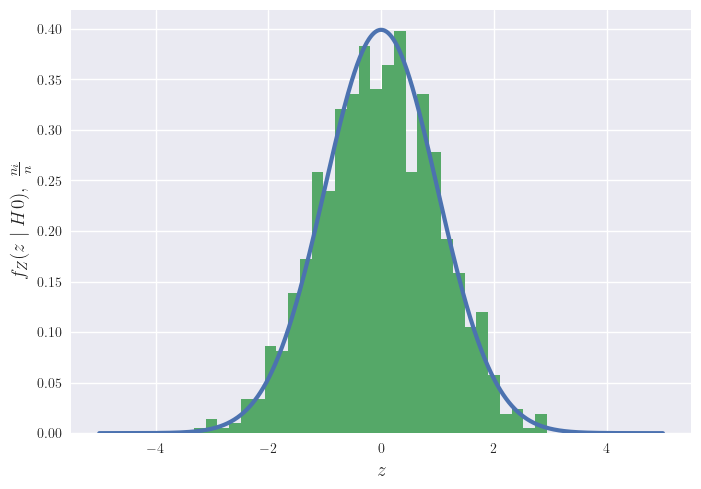

In [ ]:
X = np.linspace(-5, 5, 1000)
standard = stats.norm(loc=0, scale=1)
pdf = standard.pdf(X)

plt.plot(X, pdf, lw=3)

plt.hist(Z, bins=30, density=True)

plt.ylabel(r"$f_Z(z \mid H0),\ \frac{n_i}{n}$", fontsize=14)
plt.xlabel("$z$", fontsize=14)

plt.show()

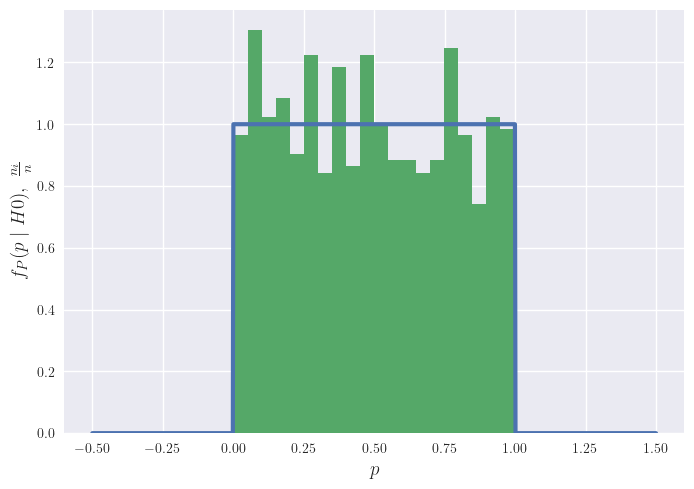

In [ ]:
X = np.linspace(-0.5, 1.5, 1000)
uniform = stats.uniform(loc=0, scale=1)
pdf = uniform.pdf(X)

plt.plot(X, pdf, lw=3)

plt.hist(P, bins=20, density=True)

plt.ylabel(r"$f_P(p \mid H0),\ \frac{n_i}{n}$", fontsize=14)
plt.xlabel("$p$", fontsize=14)

plt.show()